# Tutorial 01: Introduction

*Authors: Zach del Rosario*

---

This is an introduction to `py_grama`, a toolset for building and anlyzing models in Python.

**Learning Goals**: By completing this notebook, you will learn:
1. How to install `py_grama`
1. How to run `py_grama` in a Jupyter notebook
1. *grama* verb classes and how to recognize them
1. The key elements of a `py_grama` model and how to find them
1. How to program with *pipes*

**Prerequisites**:
- Familiarity with the Python programming language

**Table of Contents**:
1. [Setup](#s1)
  1. [Installation](#s1.1)
  1. [Jupyter](#s1.2)
1. [The *grama* language](#s2)
  1. [Objects](#s2.1)
  1. [`py_grama` models](#s2.2)
  1. [Verbs](#s2.3)
  1. [Pipes](#s2.4)

## Setup <a id="s1"></a>

In this first section, we will set up a Python environment and install `py_grama`.

---

### Installation <a id="s1.1"></a>

Requirements:
- A *terminal*
  + OS X: The *Terminal* app
  + Windows: Use *Anaconda Prompt*, installed with Anaconda Python
  + Linux: (You got this)
- Python + scientific computing packages. We recommend [Anaconda](https://www.anaconda.com/distribution/) 3.X.
- `py_grama`, hosted at [this public GitHub repo](https://github.com/zdelrosario/py_grama). Download the repository and run from terminal:

```bash
$ cd py_grama/
$ python setup.py install
$ pip install -r requirements.txt
```

If your installation is ready, you should be able to run the following code in your terminal:

```bash
$ python
```

Which will start the *Python interpreter*, in which you should be able to run:

```python
>>> import grama as gr
```

Which imports `py_grama`. Press `Control + D` to exit the Python interpreter.

### Jupyter <a id="s1.2"></a>

If you're already reading this Jupyter notebook locally, feel free to skip this section.

#### Starting Jupyter

If you're reading this notebook in your browser, you might not be aware that this *Jupyter notebook* is actually *executable*. Using your terminal, navigate to the directory with the tutorial notebooks:

```bash
$ cd py_grama/tutorials/
```

and run Jupyter with the following command:

```bash
$ jupyter notebook
```

This will open up a page in your browser. Click on `t01_introduction_exercise.ipynb` to continue this tutorial.

#### Working in Jupyter

Jupyter notebooks are organized into *cells*, and each cell is one of two types:

- **Markdown** cells contain formatted text. This cell is a Markdown cell.
- **Code** cells contain *executable python code*. The cell below is a Code cell.

You can *execute* a cell by click-selecting it (shown with a rounded rectangle to the left) and pressing `Control + Enter`. See [this tutorial](https://mybinder.org/v2/gh/ipython/ipython-in-depth/master?filepath=binder/Index.ipynb) for more information on Jupyter.

#### __Q1: Execute a cell__ 
Select the code cell below and execute it. You should see `model: Cantilever Beam` plus a bunch of information about the model. If not, make sure your installation is valid.

In [1]:
import grama as gr
from grama.models import make_cantilever_beam

md = make_cantilever_beam()
md.printpretty()

model: Cantilever Beam

  inputs:
    var_det:
      t: [2, 4]
      w: [2, 4]
    var_rand:
      H: (+1) norm, {'loc': 500.0, 'scale': 100.0}
      V: (+1) norm, {'loc': 1000.0, 'scale': 100.0}
      E: (+0) norm, {'loc': 29000000.0, 'scale': 1450000.0}
      Y: (-1) norm, {'loc': 40000.0, 'scale': 2000.0}
    copula:
        Independence copula
  functions:
    cross-sectional area: ['w', 't'] -> ['c_area']
    limit state: stress: ['w', 't', 'H', 'V', 'E', 'Y'] -> ['g_stress']
    limit state: displacement: ['w', 't', 'H', 'V', 'E', 'Y'] -> ['g_disp']


## The *grama* language <a id="s2"></a>

---

### Objects <a id="s2.1"></a>

The *grama* language has *verbs* which take action on *objects*. The primary object types of interest are:

- Data, implemented as [Pandas](https://pandas.pydata.org/) `DataFrame`s
- Models, implemented as `py_grama` `Model`s

Data are used to inform models, and models can be used to generate new data. Models also have a number of attributes: The most important are summarized below.

### `py_grama` Models <a id="s2.2"></a>

Models in `py_grama` have both *functions* and *inputs*. When studying a model, it is important to first get the *basic facts* before attempting a more involved analysis. The `printpretty()` method gives these basic facts about a model.

#### __Q2: Get the basic facts__
Use the `printpretty()` method on the model loaded below to get the basic facts on `md_ishigami`. *Hint:* We used `printpretty()` in a cell above.

In [2]:
###
# TASK: Summarize a model
# TODO: Use the printpretty() method on md_ishigami
###

# -- NO NEED TO MODIFY THIS ----
from grama.models import make_ishigami
md_ishigami = make_ishigami()

# task-begin
# -- UNCOMMENT AND COMPLETE THIS CODE ----
# md_ishigami
# task-end

# solution-begin
md_ishigami.printpretty()
# solution-end


model: Ishigami Function

  inputs:
    var_det:
      b: [0, 0.2]
      a: [6.0, 8.0]
    var_rand:
      x1: (+0) uniform, {'loc': -3.141592653589793, 'scale': 6.283185307179586}
      x2: (+0) uniform, {'loc': -3.141592653589793, 'scale': 6.283185307179586}
      x3: (+0) uniform, {'loc': -3.141592653589793, 'scale': 6.283185307179586}
    copula:
        Independence copula
  functions:
    f0: ['a', 'b', 'x1', 'x2', 'x3'] -> ['y0']


Let's take apart these basic facts:

1. `model:` precedes the *model name*.
1. `inputs:` precedes the complete list of model inputs. These are further organized into:
  1. *variables*: These are inputs which enter into the model's `functions`. There are two kinds of variables:
    1. `var_det:` Deterministic variables which take fixed, user-selected values. See `a, b` above.
    1. `var_rand:` Random variables which are inherently uncertain, see `x1, x2, x3` above. These are listed with distribution information.
  1. *parameters*: These characterize the distributions for the random variables. They are quantities like `loc, scale` above.
1. `functions:` precedes the complete list of model functions. Each function lists the variables it takes and the *outputs* it returns. The Ishigami model has just one function `fun`.

### Verbs <a id="s2.3"></a>

The *grama* verbs are organized into different classes based on their primary input and output object type. In `py_grama` these verb classes are identified by their prefixes:

| Verb Type | Prefix (Short)  | In   | Out   |
| --------- | --------------- | ---- | ----- |
| Evaluate  | `eval_` (`ev_`) | `md` | `df`  |
| Fit       | `fit_`  (`ft_`) | `df` | `md`  |
| Transform | `tran_` (`tf_`) | `df` | `df`  |
| Compose   | `comp_` (`cp_`) | `md` | `md`  |
| Plot      | `plot_` (`pt_`) | `df` | (Plot) |

For readability, we recommend naming `DataFrames` with the `df_` prefix, and models with the `md_` prefix. Let's take a look at some of the *verbs* available in `py_grama`.


Calling plot_sinew_outputs....


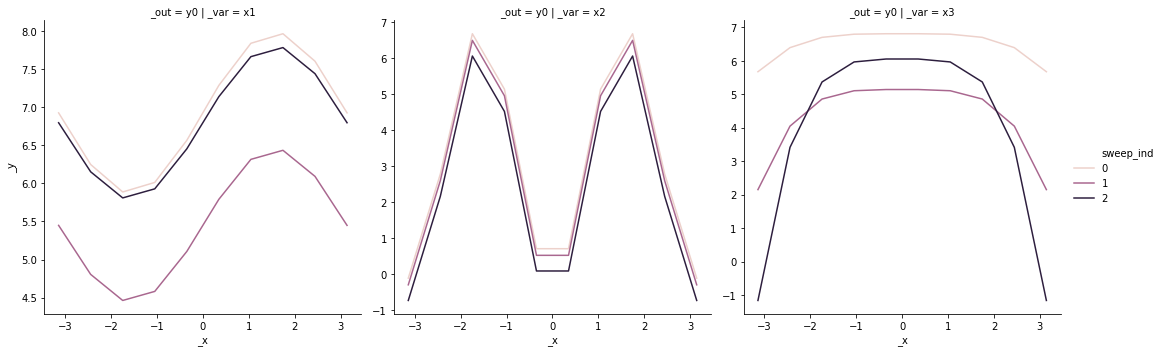

In [3]:
### EXECUTE THIS CELL

df_sinews = gr.eval_sinews(md_ishigami, df_det="nom")
gr.plot_auto(df_sinews)

The verb `gr.eval_sinews` is an Evaluation, so it takes a model and returns a dataframe. This function generates a "sinew" analysis, which sweeps across the random variables in directions parallel to their coordinate axes. The function repeats these sweeps a number of times from random starting locations. This gives us a sense of how the function behaves in each of its (random) variables, contextualized by other possibilities due to the starting location of the sweep.

The verb `gr.plot_auto` is a utility function that takes `py_grama` results and quickly constructs a visualization. This is not intended to produce presentation-quality graphics, but rather as a tool to quickly post-process data.

Based on these results, it appears that both `x1` and `x2` have some sinusoidal impact on the response, while `x3` has quadratic behavior.


### Pipes <a id="s2.4"></a>

Note that each verb class has both a full (e.g. `eval_`) and short (e.g. `ev_`) prefix form. We have seen the full prefix versions; the short prefix verbs are *pipe-enabled*. Pipes allow us to use [*functional programming*](https://en.wikipedia.org/wiki/Functional_programming) patterns. One consequence of this pattern is that we can avoid assigning *intermediate variables*. For instance, we could perform a sensitivity analysis with the following code:

```python
df_hybrid = gr.eval_hybrid(md_ishigami, df_det="nom")
df_sobol = gr.tran_sobol(df_hybrid)
df_sobol
```

We could eliminate the intermediate variables by using the *pipe operator* `>>` via:

```python
(
    md_ishigami
    >> gr.ev_hybrid(df_det="nom")
    >> gr.tf_sobol()
)
```

The `>>` operator essentially takes the output from the left and inserts it as the first argument to the function on the right. Note above that we replaced the prefixes with their short forms. Also note that we enclose the operations in parentheses; if we did not use paren, then we would need to use line continuation characters `\` at the end of each line.

#### __Q3: Functionalize__
Translate the following code into functional form using the pipe operator `>>`.

```python
df_sinews = gr.eval_sinews(md_ishigami, df_det="nom")
gr.plot_auto(df_sinews)
```


Calling plot_sinew_outputs....


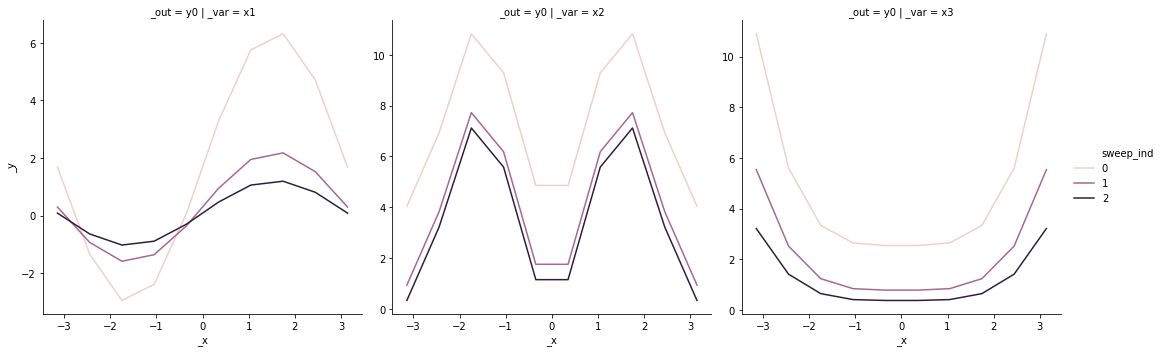

In [4]:
###
# TASK: Functionalize
# TODO: Use the pipe operator >> to translate this code
###

# task-begin
# -- UNCOMMENT AND COMPLETE THIS CODE ----
# df_sinews = gr.eval_sinews(md_ishigami, df_det="nom")
# gr.plot_auto(df_sinews)
# task-end

# solution-begin
(
    md_ishigami
    >> gr.ev_sinews(df_det="nom")
    >> gr.pt_auto()
)
# solution-end


There is a great deal more information on the *grama* language available in the [documentation](https://py-grama.readthedocs.io/en/latest/source/language.html), but this is beyond the scope of the present tutorial.

# Next Steps
When you are done, please take [this survey](https://docs.google.com/forms/d/e/1FAIpQLSdRhycrA9sQhElByOaF1CG_7-Bw9eCby4408o1gnhDMUBNZeg/viewform?usp=pp_url&entry.923399158=4088579) about the exercise.

When you're ready, move on to [Tutorial 02: Exploratory Model Analysis](https://github.com/zdelrosario/py_grama/blob/master/tutorials/t02_explore_assignment.ipynb).